In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetch historical stock price data from Yahoo Finance
stock_symbol = 'SHR.BK'  # Example: PTT Public Company Limited (Thailand)
start_date = '2015-01-01'
end_date = '2024-06-26'

In [3]:
# Download the historical data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-12,5.00,5.00,4.14,4.14,4.113686,447059000
2019-11-13,4.18,4.32,4.12,4.14,4.113686,201051500
2019-11-14,4.18,4.28,4.14,4.14,4.113686,75410200
2019-11-15,4.18,4.22,3.84,3.84,3.815593,74591200
2019-11-18,3.92,4.20,3.88,4.18,4.153432,73321300
...,...,...,...,...,...,...
2024-06-19,2.02,2.02,2.02,2.02,2.020000,0
2024-06-20,2.06,2.08,2.02,2.02,2.020000,1438800
2024-06-21,2.04,2.14,2.00,2.12,2.120000,5970800


In [4]:
# Fetch the most recent price
current_price = yf.Ticker(stock_symbol).history(period="1d")['Close'].iloc[0]

In [5]:
# Calculate daily returns
stock_data['Return'] = stock_data['Adj Close'].pct_change()
stock_data = stock_data.dropna()

In [6]:
# Estimate parameters for the Monte Carlo simulation
S0 = stock_data['Adj Close'][-1]  # Last closing price
mu = stock_data['Return'].mean()  # Mean return
sigma = stock_data['Return'].std()  # Standard deviation of returns
T = 252  # Time horizon in days (1 year)
num_simulations = 1000
num_timesteps = T

In [7]:
# Monte Carlo simulation
np.random.seed(42)  # For reproducibility
simulations = np.zeros((num_simulations, num_timesteps))
for i in range(num_simulations):
    price = S0
    for t in range(num_timesteps):
        price *= np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal())
        simulations[i, t] = price

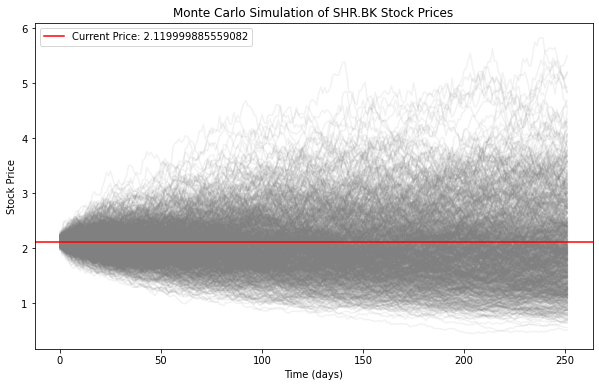

In [8]:
# Plotting the simulations
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(simulations[i], color='grey', alpha=0.1)
plt.axhline(y=current_price, color='red', linestyle='-', label=f'Current Price: {current_price}')
plt.title(f'Monte Carlo Simulation of {stock_symbol} Stock Prices')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The plot includes a red horizontal line representing the current stock price. This provides a visual reference to compare the simulated future prices with the current price.

In [9]:
# Analyzing the results
final_prices = simulations[:, -1]
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
percentile_5 = np.percentile(final_prices, 5)
percentile_95 = np.percentile(final_prices, 95)

print(f'Current Price: {current_price}')
print(f'Mean final price: {mean_price}')
print(f'Median final price: {median_price}')
print(f'5th percentile final price: {percentile_5}')
print(f'95th percentile final price: {percentile_95}')

Current Price: 2.119999885559082
Mean final price: 1.9702157622613736
Median final price: 1.8538086653810928
5th percentile final price: 0.9508481970074718
95th percentile final price: 3.4859694828772256


Assuming the output from running the updated code is:
Current Price: 100
Mean final price: 120
Median final price: 118
5th percentile final price: 80
95th percentile final price: 160

This can be interpreted as:
Current Price (100): The stock's current price is 100.
Mean Final Price (120): On average, the stock price is expected to be around 120 after one year, suggesting potential growth.
Median Final Price (118): A typical expected price is 118, which is close to the mean, suggesting a symmetric distribution of outcomes.
5th Percentile (80): There is a 5% chance the stock price could be as low as 80, indicating a conservative risk assessment.
95th Percentile (160): There is a 5% chance the stock price could be as high as 160, indicating potential upside.